## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Dataset 

In [41]:
data=pd.read_csv(r'C:\Users\chira\OneDrive\Desktop\SIH gitprojects\P1_decision_tree\Avalanche.csv')
data.head()

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,59,H,52,-17,19,2
1,24,L,23,-8,19,0
2,15,H,30,7,19,0
3,27,L,61,-13,25,1
4,34,H,4,-20,7,0


## Data Pre-Processing

In [42]:
data.isnull().any()

Slope              False
Forest Density     False
Snow Density       False
Air Temperature    False
Wind               False
Prediction         False
dtype: bool

In [78]:
x=data.iloc[:,0:5]
y=data.iloc[:,5:6]# removed .values from both , to convert from numpyarrays to pandas dataframe
y

,Prediction
0,2
1,0
2,0
3,1
4,0
...,...
199,0
200,2
201,1
202,1


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [43]:

le_data = x[['Forest Density']]  # Select 'Forest Density' as a DataFrame
x = x.drop(columns=['Forest Density'])  # Drop the original 'Forest Density' column

# Apply LabelEncoder to le_data
x['density_le'] = le.fit_transform(le_data)

# Print the updated DataFrame
column_order = ['Slope','density_le','Snow Density','Air Temperature','Wind'] 
x = x[column_order]
print(x)


     Slope  density_le  Snow Density  Air Temperature  Wind
0       59           0            52              -17    19
1       24           1            23               -8    19
2       15           0            30                7    19
3       27           1            61              -13    25
4       34           0             4              -20     7
..     ...         ...           ...              ...   ...
199     34           2            44                6     6
200     34           1            73              -34    13
201     34           2            33               13    35
202     34           1            51               -4    35
203     34           2            59              -29     8

[204 rows x 5 columns]


c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
import seaborn as sns

<Axes: >

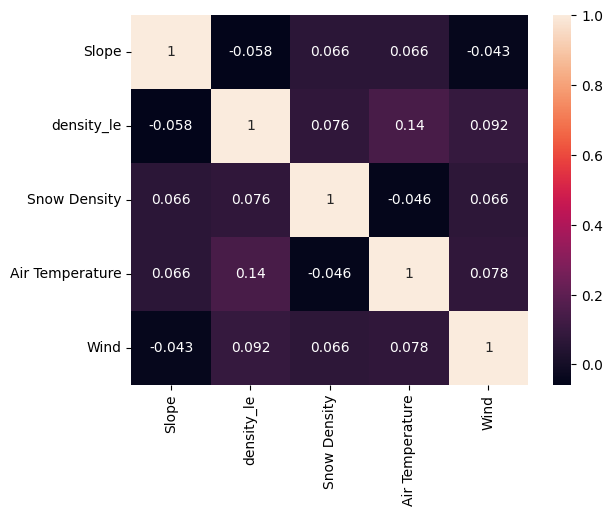

In [50]:
sns.heatmap(x.corr(),annot=True)

## Split Dataset for Test and Train

In [51]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train)



     Slope  density_le  Snow Density  Air Temperature  Wind
199     34           2            44                6     6
93      23           1            10               10    31
38      69           1            68              -28    14
24      60           2            58               15     9
96      51           2            69               11    31
..     ...         ...           ...              ...   ...
106     34           1             4                3     9
14      34           1            76              -27    38
92      20           2            16              -24    36
179     80           0            16              -14     7
102     27           1            61              -13    25

[163 rows x 5 columns]
Slope              41
density_le         41
Snow Density       41
Air Temperature    41
Wind               41
dtype: int64
Slope              163
density_le         163
Snow Density       163
Air Temperature    163
Wind               163
dtype: int64


## Apply DecisionTree Algorithm 

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [87]:
pred=dt.predict(x_test)

## Calculate Accuracy 

In [63]:
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report

In [84]:
accuracy_score = accuracy_score(y_test,pred)
print("accuracy of your model on given training data is :",accuracy_score*100,"%")

accuracy of your model on given training data is : 92.6829268292683 %


In [67]:
x_test[0:10]

,Slope,density_le,Snow Density,Air Temperature,Wind
15,34,0,2,-23,33
9,34,1,73,-34,13
115,75,1,70,-11,36
78,44,2,6,-21,34
66,55,0,24,-16,16
45,26,0,12,-8,17
132,34,1,51,-4,35
161,33,1,53,-7,24
201,34,2,33,13,35
181,76,2,52,11,11


In [104]:
print(dt.predict([[59,0,52,-17,19]]))


[2]


c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [101]:
len(pred)

array([2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0,
       0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [74]:
y_test_new=np.resize(y_test,41)
y_test_new

array([2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [98]:
c_mat=pd.DataFrame(confusion_matrix(y_test_new,pred),columns=['Class 0 predicted','Class 1 predicted','Class 2 predicted'],
                   index=['Class 0 Actual','Class 1 Actual','Class 2 Actual'])

In [100]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      0.90      0.95        20
           2       0.92      1.00      0.96        11

    accuracy                           0.93        41
   macro avg       0.91      0.93      0.92        41
weighted avg       0.93      0.93      0.93        41



In [77]:
print(c_mat)

                Class 0 predicted  Class 1 predicted  Class 2 predicted
Class 0 Actual                  9                  0                  1
Class 1 Actual                  2                 18                  0
Class 2 Actual                  0                  0                 11
